In [4]:
import croparray as ca
ca1 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True
)

In [5]:
import croparray as ca
ca2 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc", as_object=True
)

In [6]:
import croparray as ca
ca3 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/SA_XBP1/DataAnalysis/Cell01.nc", as_object=True
)


In [7]:
ca1.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(th1=1000, close_px=1, smooth_px=1, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [8]:
ca2.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(th1=500, close_px=1, smooth_px=1, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [7]:
ca3.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(th1=2000, close_px=1, smooth_px=1, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [9]:
ca1.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [10]:
ca2.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [10]:
ca3.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [11]:
ecc1 = ca1.ds["ch0_mask_manual__eccentricity"]
{"mean":   ecc1.mean().item(),"median": ecc1.median().item(),"std": ecc1.std().item(),}

{'mean': 0.38335000410752773,
 'median': 0.4898979485566357,
 'std': 0.29813428271819736}

In [12]:
ecc2 = ca2.ds["ch0_mask_manual__eccentricity"]
{"mean":   ecc2.mean().item(), "median": ecc2.median().item(),"std":    ecc2.std().item(),}

{'mean': 0.4656435993078806,
 'median': 0.6123724356957945,
 'std': 0.3107721419671974}

In [13]:
ecc3 = ca3.ds["ch0_mask_manual__eccentricity"]
{"mean":   ecc3.mean().item(),"median": ecc3.median().item(),"std":    ecc3.std().item(),}

{'mean': 0.5763184074048664,
 'median': 0.6517635393847102,
 'std': 0.26090072206606085}

In [42]:
import napari
viewer = napari.Viewer()
temp = ca1.plot.montage(row='n', col='n').best_z 
temp_ch0 = ca1.plot.montage(row='n', col='n').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x787f9b45d900>

In [43]:
import napari
viewer = napari.Viewer()
temp = ca2.plot.montage(row='n', col='n').best_z 
temp_ch0 = ca2.plot.montage(row = 'n', col = 'n').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x787edc1d57e0>

In [48]:
import napari
viewer = napari.Viewer()
temp = ca3.plot.montage(row='n', col='n').best_z 
temp_ch0 = ca.tools.montage(ca3, row = 'n', col = 'n').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x787f24661540>

In [13]:
ta1 = ca.crop_array_tools.track_array(ca1, as_object=True)
ta2 = ca.crop_array_tools.track_array(ca2, as_object=True)
ta3 = ca.crop_array_tools.track_array(ca3, as_object=True)

In [15]:
# # Sort tracks by maximal translation signal in one channel with minimal translation signal in another channel (these would be the 'one-color' tracks that don't have leakiness)
# # Parameters for sorting
# ch_high = 1
# ch_low = 2
# t_start, t_stop = 00, 5000
# rolling = 30
# fov=0

# # Extract and smooth signal for both channels
# sig_ch1 = my_ta.signal.sel(fov=fov, ch=ch_high, t=slice(t_start, t_stop)).rolling(t=rolling, min_periods=1).mean()
# sig_ch2 = my_ta.signal.sel(fov=fov, ch=ch_low, t=slice(t_start, t_stop)).rolling(t=rolling, min_periods=1).mean()

# # Compute per-track max intensity in window
# max_ch1 = sig_ch1.max(dim='t')
# max_ch2 = sig_ch2.max(dim='t')

# # Define custom score: high ch1 and low ch2
# score = max_ch1 - max_ch2

# # Remove NaN scores before sorting
# score_clean = score.where(~np.isnan(score), drop=True)

# # Sort by cleaned score
# ta_sort = my_ta.sortby(score_clean, ascending=False)

# # Get track IDs
# my_selected_tracks = ta_sort.track_id.values
# my_selected_tracks


In [49]:
import napari
viewer = napari.Viewer()
temp = ca.tools.montage(ta3, row = 'track_id', col = 't').best_z
temp_ch0 = ca.tools.montage(ta3, row = 'track_id', col = 't').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(


<Image layer 'ch_spots' at 0x787f9e0cece0>

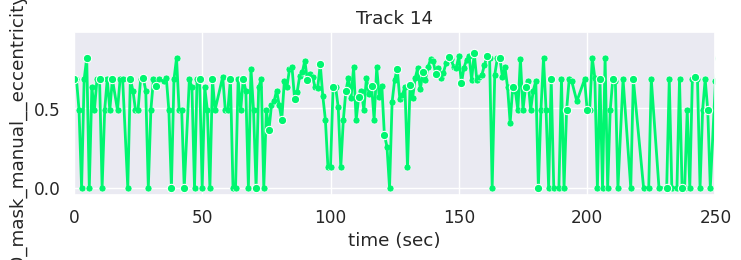

In [18]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__eccentricity",track_ids=[14],xlim=(0,250),rgb=(1,1,1))

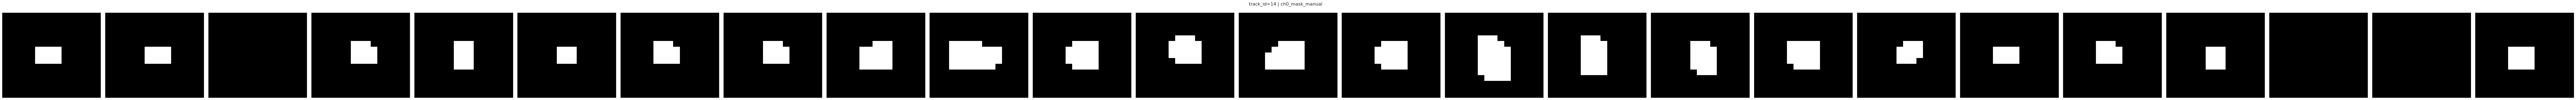

In [19]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual", track_id=[14], t=(0, 250, 10));

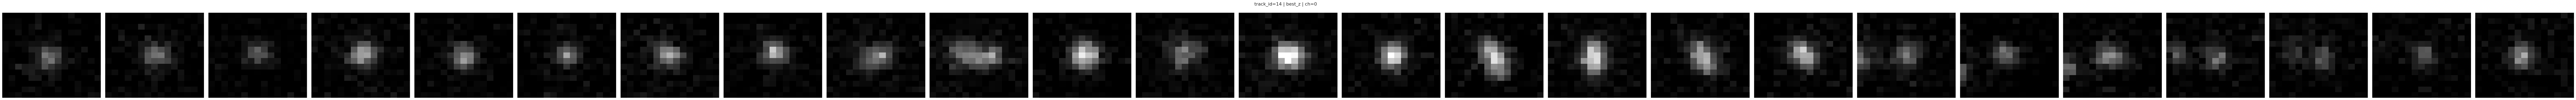

In [20]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[14], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

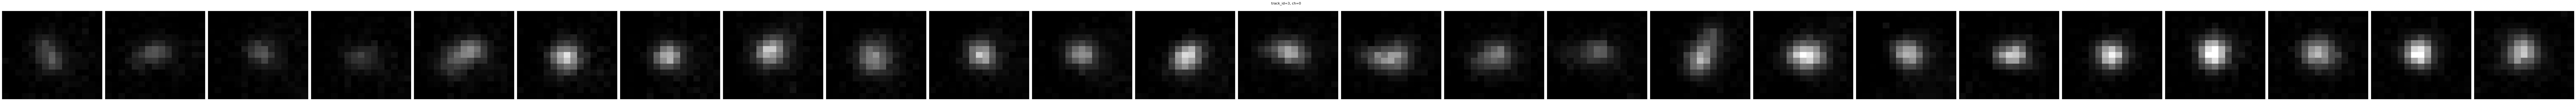

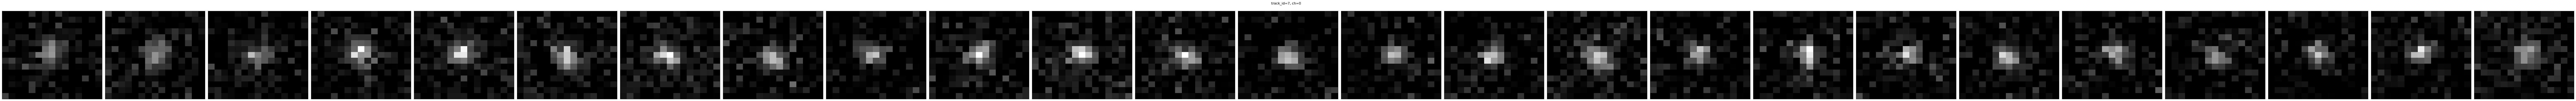

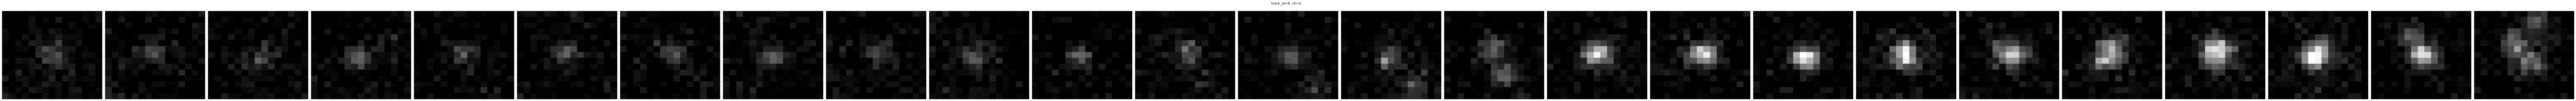

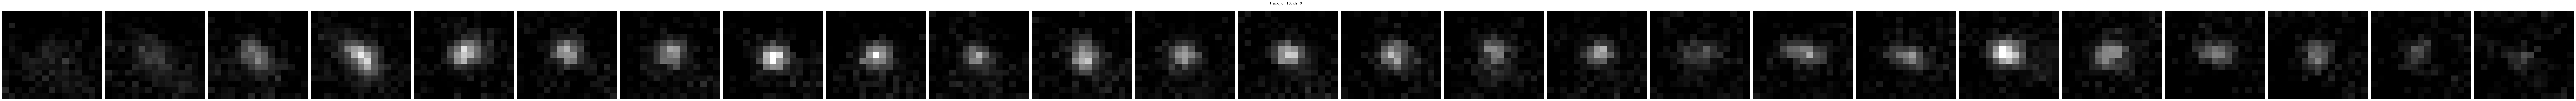

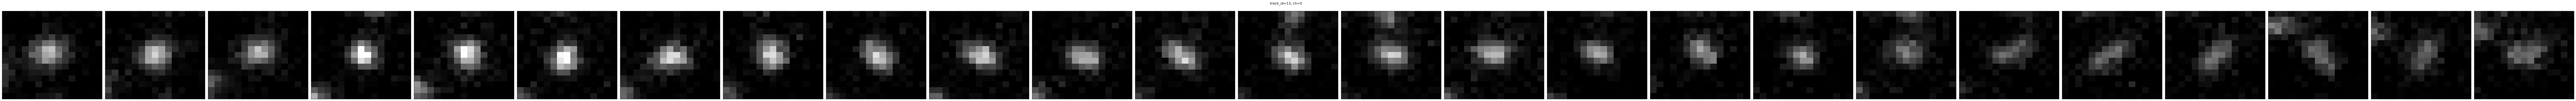

In [12]:
ta3.plot.plot_trackarray_crops(fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

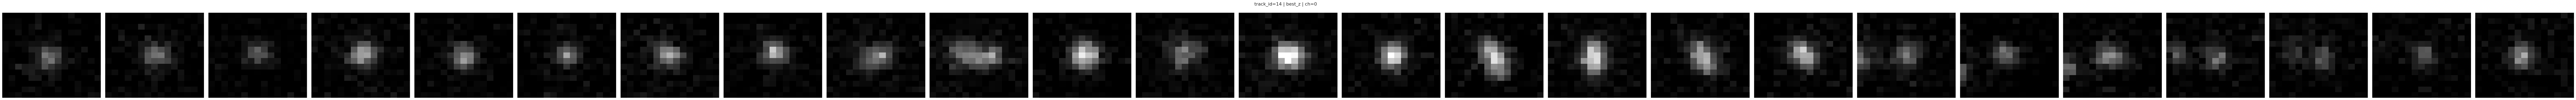

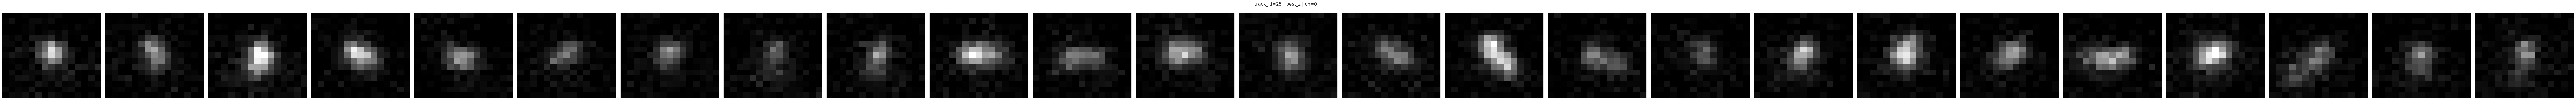

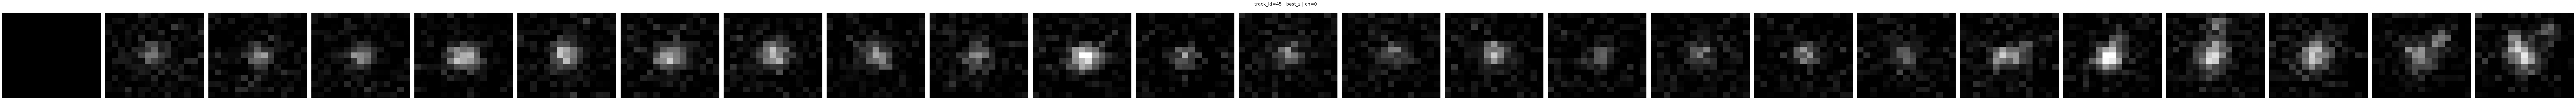

In [17]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

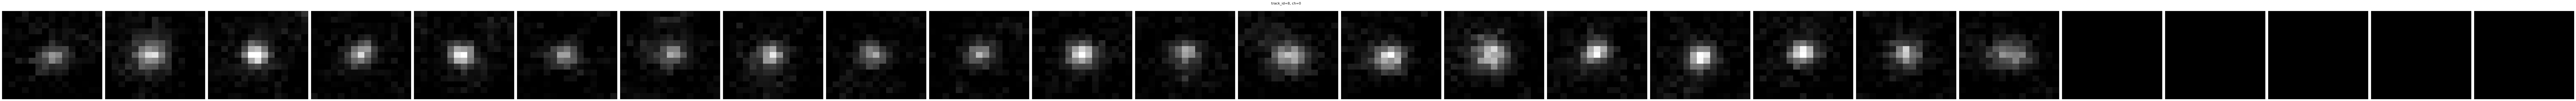

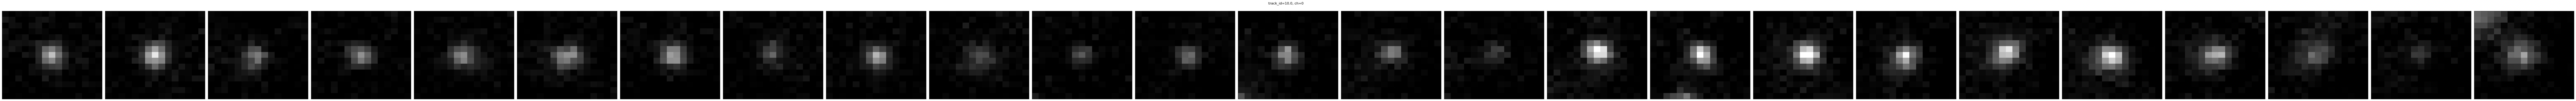

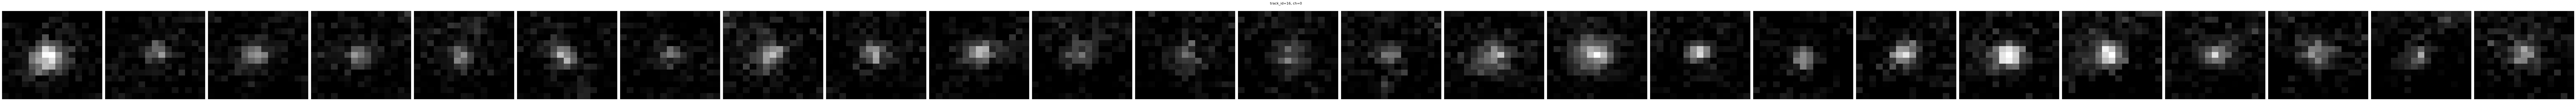

In [13]:
ta2.plot.plot_trackarray_crops(fov=0, track_id=[8,10.,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/home/tstasevi/miniconda3/envs/croparray_env/lib/python3.10/site-packages/napari/_vispy/layers/scalar_field.py:197: UserWarning: data shape (2085, 16500) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(


<Image layer 'ch_spots' at 0x718b67318cd0>